In [15]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv

--2025-04-02 15:14:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 154822125 (148M) [text/csv]
Saving to: ‘survey-data-with-duplicate.csv’

survey-data-with-du 100%[===================>] 147.65M  74.5MB/s    in 2.0s    

2025-04-02 15:14:39 (74.5 MB/s) - ‘survey-data-with-duplicate.csv’ saved [154822125/154822125]



In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 172.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 170.3 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 158.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 130.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 114.6 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


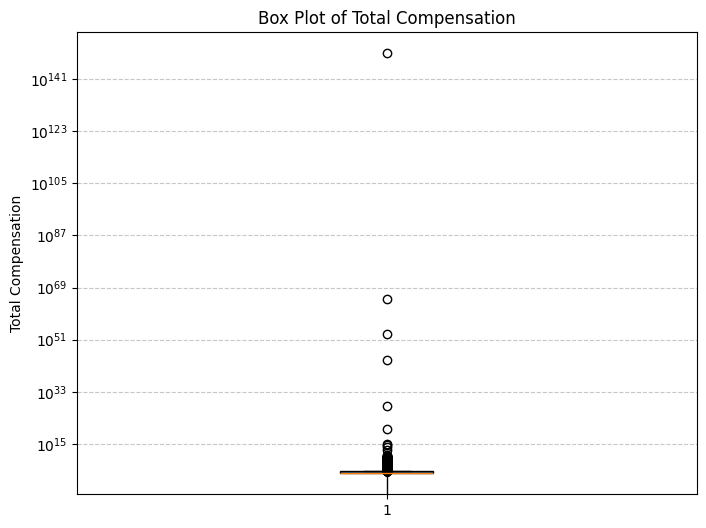

In [16]:
#1.1. Box Plot of CompTotal (Total Compensation)
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
plt.figure(figsize=(8, 6))
plt.boxplot(df["CompTotal"], vert=True, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))
plt.ylabel("Total Compensation")
plt.title("Box Plot of Total Compensation")
plt.yscale("log")  # Log scale to handle skewed compensation data
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

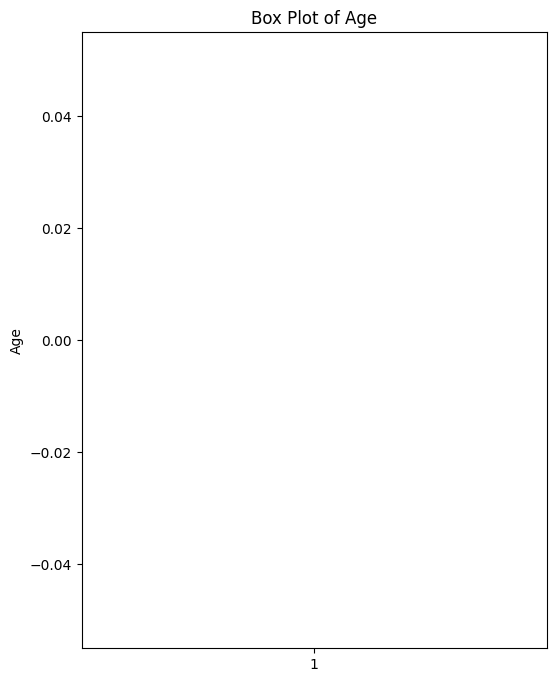

In [17]:
#2. Box Plot of Age (converted to numeric values)
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df = pd.read_sql_query(query, conn)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df['Age'] = df['Age'].fillna(df['Age'].mean())  
plt.figure(figsize=(6, 8))
plt.boxplot(df["Age"], vert=True, patch_artist=True, boxprops=dict(facecolor="#1f77b4"))
plt.ylabel("Age")
plt.title("Box Plot of Age")
plt.show()

In [18]:
#2.1. Box Plot of CompTotal Grouped by Age Groups:
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)
df["CompTotal"] = pd.to_numeric(df["CompTotal"], errors="coerce")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bins = [18, 25, 35, 45, 55, 60, 65] 
labels = ['18-25', '26-35', '36-45', '46-55', '56-65',]  
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AgeGroup', y='CompTotal', data=df)
plt.title('Box Plot of Compensation (CompTotal) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation (CompTotal)')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

KeyError: 'Age'